<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-AI_programming/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week10

In [35]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions

In [36]:
range = torch.arange(-5.0, 5.0, 0.1)
logits = torch.tensor([2.0, -1.0, 0.5])

In [37]:
def plot_graph(f_y, x, y):
  f_x = range
  plt.plot(f_x, f_y)
  plt.scatter(x, y, color='r')
  plt.show()

## Sigmoid

sigmoid outputs: tensor([0.88, 0.27, 0.62])


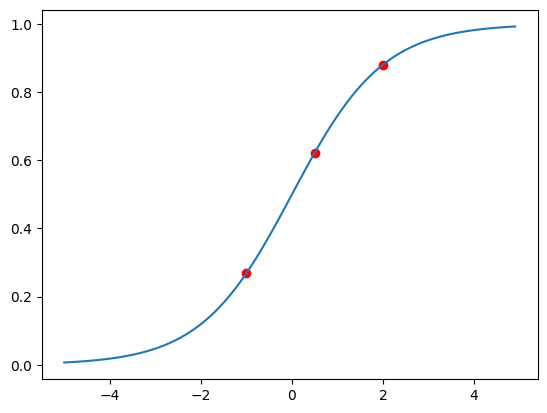

In [38]:
sigmoid_outputs = torch.sigmoid(logits)
torch.set_printoptions(precision=2)
print('sigmoid outputs:', sigmoid_outputs)

plot_graph(torch.sigmoid(range), logits, sigmoid_outputs)

## Softmax

In [74]:
# functional api
softmax_outputs = F.softmax(logits, dim=-1)
print(f'{softmax_outputs=}')

softmax_outputs=tensor([[0.25, 0.28, 0.46],
        [0.50, 0.25, 0.25],
        [0.32, 0.39, 0.29]], grad_fn=<SoftmaxBackward0>)


In [73]:
# class 이용
softmax = torch.nn.Softmax(dim=-1)
softmax_outputs = softmax(logits)
print(f'{softmax_outputs=}')

NameError: name 'softmax' is not defined

## LogSoftmax

In [72]:
log_softmax_outputs = F.log_softmax(logits, dim=0)
print('LogSoftmax outputs:', log_softmax_outputs)

LogSoftmax outputs: tensor([-0.24, -3.24, -1.74])


# Loss Functions

## BCELoss

In [41]:
import torch.nn as nn

# 예측값과 실제값
outputs = torch.tensor([0.7, 0.2, 0.9], requires_grad=True).float()
targets = torch.tensor([1.0, 0.0, 1.0]).float()

# BCELoss 선언
criterion = nn.BCELoss()

# 시그모이드 활성화 적용
outputs = torch.sigmoid(outputs)

# 손실 계산
loss = criterion(outputs, targets)
print('BCELoss:', loss.item())

BCELoss: 0.514159619808197


## BCEWithLogitsLoss

In [42]:
import torch
import torch.nn as nn

# 원시 출력값 (시그모이드 활성화 적용 전 raw score)
raw_outputs = torch.tensor([0.5, -1.0, 2.0], requires_grad=True)
targets = torch.tensor([1.0, 0.0, 1.0])

# BCEWithLogitsLoss 선언
criterion = nn.BCEWithLogitsLoss()

# 손실 계산 (시그모이드 내부 적용)
loss = criterion(raw_outputs, targets)
print(f'BCEWithLogitsLoss: {loss.item():.4f}')

BCEWithLogitsLoss: 0.3048


## CrossEntropyLoss

In [43]:
import torch
import torch.nn as nn

# 원시 출력값 (softmax 활성화 적용 전)
raw_outputs = torch.tensor(
	[[1.0, 2.0, 3.0],
         [1.0, 2.0, 0.0],
         [0.0, 2.0, 1.0]],
        requires_grad=True).float()
targets = torch.tensor([2, 0, 1]).long()  # 각 샘플의 클래스 인덱스
print(targets.dtype)
# CrossEntropyLoss 선언
criterion = nn.CrossEntropyLoss()

# 손실 계산 (softmax 내부 적용)
loss = criterion(raw_outputs, targets)
print(f'CrossEntropyLoss: {loss.item():.2f}')

torch.int64
CrossEntropyLoss: 0.74


## NLLLoss
Negative Log Likelihood Loss

In [44]:
import torch
import torch.nn

# 모델 출력
logits = torch.tensor(
	[[0.1, 0.2, 0.7], # max idx 2
     	 [0.8, 0.1, 0.1], # max idx 0
     	 [0.3, 0.5, 0.2]], # max idx 1
    	requires_grad=True).float()

# 타겟 클래스 인덱스
targets = torch.tensor([2, 0, 1]).long()

# 로그 소프트맥스 적용
log_softmax = F.log_softmax(logits, dim=1)

# NLLLoss 선언
criterion = nn.NLLLoss()
loss = criterion(log_softmax, targets)
print(f'NLLLoss with LogSoftmax: {loss.item():.2f}')

NLLLoss with LogSoftmax: 0.80


앞서 소개한 loss function과 activation function은 PyTorch를 사용하는 딥러닝 모델을 구축하고 효과적으로 훈련하는 데 필수적임.

각 함수의 선택과 사용은 model의 특성과 task의 유형에 따라 달라질 수 있음.

Binary Classification
- BCELoss or BCEWithLogitsLoss

Multiple-class Classification:
- CrossEntropyLoss 사용
- LogSoftmax와 NLLLoss의 조합

Activation Function:
- Sigmoid는 binary classification(이진 분류)에서
- Softmax는 mutiple-class classification(다중 클래스)의 확률을 직접 계산하고,
- LogSoftmax는 확률의 로그 값을 계산하여 보다 수치적으로 stable(안정적)인 결과를 제공.

<hr>

In [45]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [46]:
import pandas as pd

# input feature vector를 DataFrame 인스턴스로
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# target column을 추가.
df['label'] = cancer.target

# WBCD
Wisconsin Breast Cancer Dataset<br>
scikit learn에서 dataset load.
(dl_torch_binary_classification.ipynb)

In [47]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(type(cancer))
dir(cancer)

<class 'sklearn.utils._bunch.Bunch'>


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [48]:
from IPython import display
display.Markdown(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [49]:
import pandas as pd

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [50]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [52]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [53]:
import numpy as np
np.unique(cancer.target_names) # 0: benign, 1: malignant

array(['benign', 'malignant'], dtype='<U9')

In [54]:
x_raw = cancer.data
y_raw = cancer.target

print(f'{type(x_raw)=}:{x_raw.shape=}')
print(f'{type(y_raw)=}:{y_raw.shape=}')

type(x_raw)=<class 'numpy.ndarray'>:x_raw.shape=(569, 30)
type(y_raw)=<class 'numpy.ndarray'>:y_raw.shape=(569,)


In [55]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [56]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_raw, y_raw, test_size = .1,
    stratify=y_raw,
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size = .1,
    stratify=y_train,
)

print(f'{len(x_train)=}\n  {len(x_val)=}\n {len(x_test)=}')

len(x_train)=460
  len(x_val)=52
 len(x_test)=57


In [57]:
import numpy as np

test_r  = np.unique(y_test , return_counts = True)
train_r = np.unique(y_train, return_counts = True)
val_r   = np.unique(y_val,   return_counts = True)

print("test's cancer ratio : ", np.round( test_r[1][1]/np.sum( test_r[1]),2))
print("train's cancer ratio: ", np.round(train_r[1][1]/np.sum(train_r[1]),2))
print("val's cancer ratio. : ", np.round(  val_r[1][1]/np.sum(  val_r[1]),2))

test's cancer ratio :  0.63
train's cancer ratio:  0.63
val's cancer ratio. :  0.63


In [58]:
print(f'{x_train.shape=}\n{  x_val.shape= }\n {x_test.shape= }')

x_train.shape=(460, 30)
  x_val.shape= (52, 30)
 x_test.shape= (57, 30)


In [59]:

from torch.utils.data import Dataset
import torch
import torch.nn as nn

class BCDataset (Dataset):

  def __init__(self, r_vec, r_label):
    self.data = torch.tensor(r_vec).float()
    self.label = torch.tensor(r_label).float().unsqueeze(1)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx],self.label[idx]

train_ds = BCDataset(x_train,y_train)
val_ds = BCDataset(x_val, y_val)
test_ds = BCDataset(x_test, y_test)

In [60]:
next(iter(train_ds))

(tensor([2.06e+01, 1.74e+01, 1.35e+02, 1.34e+03, 9.45e-02, 1.08e-01, 1.53e-01,
         8.94e-02, 1.57e-01, 5.48e-02, 6.14e-01, 6.58e-01, 4.12e+00, 7.70e+01,
         6.21e-03, 1.90e-02, 2.68e-02, 1.23e-02, 1.28e-02, 1.71e-03, 2.54e+01,
         2.32e+01, 1.67e+02, 1.95e+03, 1.56e-01, 3.06e-01, 4.16e-01, 2.11e-01,
         2.69e-01, 7.06e-02]),
 tensor([0.]))

In [61]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 32,
    shuffle = True,
)
valid_loader = DataLoader(
    dataset = val_ds,
    batch_size = 32,
    shuffle = True,
)
test_loader = DataLoader(
    dataset = test_ds,
    batch_size = 32,
    shuffle = False,
)

In [62]:
from tqdm import tqdm

def train_loop (
    n_epoch,
    train_ds, val_ds,
    model, optimizer, loss_fnc,
    device = 'cpu',):

  log_hist = torch.zeros([0,3]).to(device)
  for epoch in tqdm(range(n_epoch)):
    # print(f'\r{epoch:6>}', end='')

    model = model.to(device)
    model.train()

    for x_tensor, y_tensor in train_ds:

      x_tensor.to(device)
      y_tensor.to(device)

      y_pred = model(x_tensor)
      loss_train = loss_fnc(y_pred, y_tensor)

      if torch.isinf(loss_train):
        print(f'Error: loss is infinity!')
        break

      optimizer.zero_grad()
      loss_train.backward()
      optimizer.step()

    with torch.no_grad():
      for x_tensor, y_tensor in val_ds:
        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)
        model.eval()
        pred = model(x_tensor)
        loss_val = loss_fnc(pred, y_tensor)


    if epoch % 100 == 0:
      tmp = torch.tensor([epoch, loss_train.item(), loss_val.item()]).to(log_hist.device)
      # print(tmp)
      log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 )
      print(f' Epoch / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

    if epoch == n_epoch:
      print(f' Epoch / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

  return model,log_hist

In [63]:
class SimpleModel(nn.Module):

  def __init__(self, n_feature):
    super().__init__()

    self.l0 = nn.Linear(n_feature, 16)
    self.a0 = nn.ReLU()
    self.l1 = nn.Linear(16,16)
    self.a1 = nn.ReLU()
    self.lf = nn.Linear(16,1)
    self.out = nn.Sigmoid()

  def forward(self, x):
    x = self.l0(x)
    x = self.a0(x)
    x = self.l1(x)
    x = self.a1(x)
    x = self.lf(x)
    x = self.out(x)

    return x


In [64]:
# input vector의 number of components확인.
n_features = x_raw.shape[-1]
print(f'{n_features    =}')

# random한 input vector 5개에 대한
# 모델의 예측 결과를 확인하여
# 모델의 i/o 의 shape 확인.
model = SimpleModel(n_features)
x = torch.randn( (5, n_features) )
print(f'{x.shape       =}')
print(f'{model(x).shape=}')

n_features    =30
x.shape       =torch.Size([5, 30])
model(x).shape=torch.Size([5, 1])


In [65]:

# device 설정.
device = (
      "cuda" if torch.cuda.is_available()
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  )
print(f"{device=}")

device='cpu'


In [66]:

# number of epochs
n_epoch = 1000
# learning ratio
lr = 1e-4

# loss function 설정
loss_fnc  = nn.BCELoss()
# 모델 생성 및 초기화
model = SimpleModel(n_features)
# optimizer 생성 및 초기화
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

m, h = train_loop (
    n_epoch,
    train_loader, valid_loader,
    model, optimizer, loss_fnc,
    device = device)

TypeError: 'Tensor' object is not callable

In [ ]:
h

In [ ]:
import matplotlib.pyplot as plt

h0 = h.detach().numpy()
print(h0.shape)
plt.plot(h0[:,0], h0[:,1], label='train')
plt.plot(h0[:,0], h0[:,2], label='valid')
plt.legend()
plt.grid()
plt.show()

In [ ]:
f_m = model.cpu()
f_m.eval()
with torch.no_grad():
  is_first = True
  for x_tensor, y_tensor in test_loader:
    x_tensor = x_tensor.cpu()
    y_tensor = y_tensor.cpu()
    pred = f_m(x_tensor)

    # print(y_tensor.numpy().shape)
    if is_first:
      test_pred_prob = pred.numpy().copy()
      test_label = y_tensor.numpy().copy()
      is_first = False
    else:
      test_label = np.concatenate((test_label, y_tensor.numpy()), axis=0)
      test_pred_prob = np.concatenate((test_pred_prob, pred.numpy()), axis=0)

print(test_label.shape, test_label.dtype)
print(test_pred_prob.shape, test_pred_prob.dtype)

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)
pred = np.round(test_pred_prob)
label = test_label

print('Confusion Matrix\n',
      str(confusion_matrix(label,pred))
      )
print(f'Precision:{precision_score(label,pred):.2f}')
print(f'Recall.  :{recall_score(label,pred):.2f}')
print(f'F1-Score :{f1_score(label,pred):.2f}')
print(f'F2-Score :{fbeta_score(label,pred,beta=2):.2f}')

In [ ]:

pred

버그가 2개 숨겨져 있음.